In [42]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

In [65]:
class Gradient_Descent():
    def __init__(self, feature_file = 'features.txt', target_file = 'target.txt'):
        self.data = list()
        with open(feature_file) as feature_fh, open(target_file) as target_fh:
            self.sample_number = 0
            for X, y in zip(feature_fh, target_fh):
                x = np.array([int(x) for x in (X.strip()).split(',')])
                y = int(y.strip())
                self.data.append((x, y))
                self.sample_number += 1
        print('finished caching training sets')
        
    def compute_loss(self, W, b, C):
        RuLu = 0
        for x, y in self.data:
            RuLu += max(0, 1 - y*(W.dot(x) + b))
        return 1/2 * np.sum(W**2) + C * RuLu
    
    @staticmethod
    def compute_delta(previous_delta, old_loss, current_loss):
        return 0.5 * previous_delta + 0.5 * (abs(old_loss - current_loss)/old_loss * 100)
    
    def batch_convergence(self, old_loss, current_loss, threshold):
        if abs(old_loss - current_loss)/old_loss * 100 < threshold:
            return False
        else:
            return True
        
    def make_plot(self):
        fig, ax = plt.subplots()
        
        line1, = ax.plot(self.batch_loss_list, label='batch gradient descent')
        line2, = ax.plot(self.stochastic_loss_list, label='stochastic gradient descent')
        line3, = ax.plot(self.minibatch_loss_list, label='minibatch gradient descent')
        ax.legend(loc='upper right')
        ax.set_xlabel('iteration')
        ax.set_ylabel('loss')
        plt.show()
    
    def batch_gradient_descent(self, C = 100, d = 122, eta =  0.0000003, eps = 0.25):
        W = np.zeros(d)
        b = 0

        old_loss = 1
        current_loss = self.compute_loss(W, b, C)
        self.batch_loss_list = list()
        
        while self.batch_convergence(old_loss, current_loss, eps):
            W_grad = np.zeros(d)
            b_grad = 0
            for x, y in self.data:
                if y * (x.dot(W) + b) < 1:
                    W_grad += -y*x
                    b_grad += -y

            W = W - eta * (C * W_grad + W)
            b = b - eta * C * b_grad

            old_loss = current_loss
            current_loss = self.compute_loss(W, b, C)
            self.batch_loss_list.append(current_loss)
        
    def stochastic_gradient_descent(self, C = 100, d = 122, eta =  0.0001, eps = 0.001):
        W = np.zeros(d)
        b = 0
        
        self.stochastic_loss_list = list()
        delta = 0
        shuffle_data = self.data
        shuffle(shuffle_data)
        i = 0
        
        current_loss = self.compute_loss(W, b, C)
        while True:
            x, y = shuffle_data[i]
            if y * (x.dot(W) + b) < 1:
                W_grad = C * (-y*x) + W
                b_grad = - C * y
            else:
                W_grad = W
                b_grad = 0

            W = W - eta * W_grad
            b = b - eta * b_grad

            old_loss = current_loss
            current_loss = self.compute_loss(W, b, C)
            self.stochastic_loss_list.append(current_loss)
            delta = Gradient_Descent.compute_delta(delta, old_loss, current_loss)
            i = (i + 1) % self.sample_number
            if delta < eps:
                break
        
    def minibatch_gradient_descent(self, batch_size = 20, C = 100, d = 122, eta =  0.00001, eps = 0.01):
        W = np.zeros(d)
        b = 0

        current_loss = self.compute_loss(W, b, C)
        
        self.minibatch_loss_list = list()
        delta = 0
        shuffle_data = self.data
        shuffle(shuffle_data)
        i = 0
        
        def minibatch(data, batch_size, index):
            return data[index*batch_size : min(self.sample_number - 1, (index+1)*batch_size)]
        
        while True:
            W_grad = np.zeros(d)
            b_grad = 0
            for x, y in minibatch(shuffle_data, batch_size, i):
                if y * (x.dot(W) + b) < 1:
                    W_grad += -y*x
                    b_grad += -y

            W = W - eta * (C * W_grad + W)
            b = b - eta * C * b_grad

            old_loss = current_loss
            current_loss = self.compute_loss(W, b, C)
            self.minibatch_loss_list.append(current_loss)
            delta = Gradient_Descent.compute_delta(delta, old_loss, current_loss)
            i = (i + 1) % int((self.sample_number + batch_size -1)/batch_size)
            if delta < eps:
                break
    
    def main(self):
        print('starting batch GD...')
        self.batch_gradient_descent()
        print('starting SGD...')
        self.stochastic_gradient_descent()
        print('starting minibatch GD...')
        self.minibatch_gradient_descent()
        self.make_plot()

finished caching training sets
starting batch GD...
starting SGD...
starting minibatch GD...


<IPython.core.display.Javascript object>


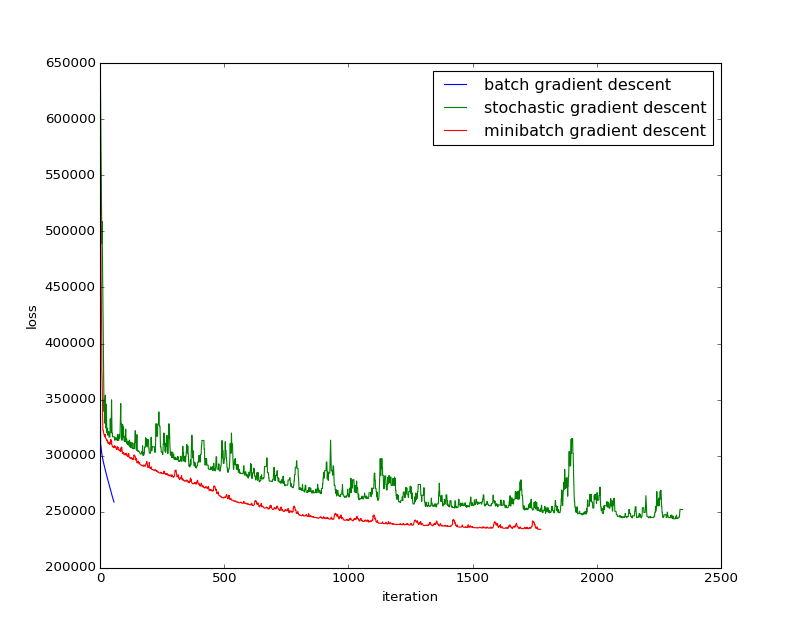

In [66]:
gradient_descent = Gradient_Descent()
gradient_descent.main()